In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from pandas import DataFrame
from scipy.stats import chisquare
import matplotlib.pyplot as plt

## 17.1

In [11]:
data1 = DataFrame({"Type":["Women","Men","Total"], 
                "A":[65, 67, 132],
                "B":[75, 63, 138],
                "Total":[140, 130, 270],} )
data1

,Type,A,B,Total
0,Women,65,75,140
1,Men,67,63,130
2,Total,132,138,270


In [12]:
pm = data1.A[1]/data1.Total[1]
qm = 1-pm
odds_men = pm/qm
pw = data1.A[0]/data1.Total[0]
qw = 1-pw
odds_women = pw/qw
print('Men selected Commercial A:' , pm)
print('Men selected Commercial B:' , qm)
print('Women selected Commercial A:' , pw)
print('Women selected Commercial B:' , qw)
print('Odds for men: ' , odds_men)
print('Odds for women: ' , odds_women)

Men selected Commercial A: 0.5153846153846153
Men selected Commercial B: 0.48461538461538467
Women selected Commercial A: 0.4642857142857143
Women selected Commercial B: 0.5357142857142857
Odds for men:  1.0634920634920633
Odds for women:  0.8666666666666667


## 17.3

In [13]:
log_women = np.log(odds_women)
log_men = np.log(odds_men)
print('log odds for men: ', log_men)
print('log odds for women: ', log_women)

log odds for men:  0.06155789299943316
log odds for women:  -0.1431008436406733


## 17.5

In [32]:
b0 = log_women
b1 = log_men-log_women 
print("b0:",b0)
print("b1:",b1)
print("log(odds) =",b0,"+",b1,"x")
print("odds ratio =",np.exp(b1))

b0: -0.1431008436406733
b1: 0.20465873664010645
log(odds) = -0.1431008436406733 + 0.20465873664010645 x
odds ratio = 1.2271062271062267


## 17.7

In [33]:
def odds(x):
    return np.exp(-1.41+0.781*x)
x = 1 #for any x
ratio = odds(x+1)/odds(x)
ratio

2.1836548288635016

## 17.9


### From 17.1 we know that 
$log(odds) = -0.143 + 0.204*x$ 

The-odds ratio estimate is 1.2271062271062267

In [37]:
z = norm.ppf(0.975)
se = 4/(270**0.5)

print('The 95% confidence interval is','(',np.exp(b1-z*se),',',np.exp(b1+z*se),')')

The 95% confidence interval is ( 0.7615041158900302 , 1.9773887772660863 )


## 17.11

In [41]:
b11 = 3.109
se = 0.388
print('The 95% confidence interval for b1 is','(',b11-z*se,',',b11+z*se,')')

The 95% confidence interval for b1 is ( 2.348533973998459 , 3.869466026001541 )


## 17.13

In [43]:
z_value = b11/se
print('z-value =', b11/se)
print('square of z =', z_value**2)

z-value = 8.012886597938143
square of z = 64.20635163141671


## 17.15

#### (a) In Logistic regression our explained or dependent variable is binary i.e 0 or 1 and explanatory variable can be either binary or decimal number, so if b1=2, in logistic regression analysis with only one explanatory variable we estimate the value (not probability) of the explained variable be equal to b1*x or 2*x. Remember that regression is designed in such a way that outcome is either 0 or 1.

#### (b) The intercept b0 is equal to the value (not odds of an event) of the explained variable( dependent variable ) when x's=0 for linear or non-linear regressions.

#### (c) The odds of an event whose probability of happening is p is equal to 
# odds = $\frac{p}{1-p}$ 

#### the ratio of the probability of the event to the probability of its complement.Or it is the ratio of favourable outcomes to unfavourable outcomes.

## 17.17

#### We do not have dataset to solve this task

## 17.19

#### Those who order alcoholic drinks are 12.5% more likely (or 1.125 times as likely) to leave a high tip than those who don’t order alcohol. Senior adults are about 25.8% less likely (or 0.742 times as likely) to leave a high tip than those who aren’t senior. Those who speak English as a second language are about 26.4% less likely (or 0.736 times as likely) to leave a high tip than their counterparts. Those who are French-speaking Canadians are about 21.6% less likely (or 0.784 times as likely) to leave a high tip than those who aren’t French-speaking Canadians. 

## 17.21

#### (a)If the confidence interval for the odds ratio includes the value 1, the variable is not significant in a logistic regression.

#### (b) Because the Reader age, Model sex, and Women’s magazines intervals all do not contain 1, they are all significant. The Men’s magazine interval contains 1 and is not significant. 

#### (c) Interpreting only significant effects: When the reader age is mature adults, the model clothing is 1.27 to 2.16 times more likely to be not sexual. When the model sex is male, the model clothing is 2.74 to 5.01 times more likely to be not sexual. When the intended readership is women, the model clothing is 1.11 to 2.23 times more likely to be not sexual. The odds ratios are often much easier to interpret than the fitted coefficients.

## 17.23


In [61]:
df = DataFrame({"Explanatory variable":["Sex","Daily Internet use","Age","Income","Size","Education","Intercept"], "Odds ratio":[0.87, 4.16, 0.81, 1.01, 0.85, 0.97, 0.66]} )
df

,Explanatory variable,Odds ratio
0,Sex,0.87
1,Daily Internet use,4.16
2,Age,0.81
3,Income,1.01
4,Size,0.85
5,Education,0.97
6,Intercept,0.66


#### Females are 0.87 times as likely (13% less likely) to use the website as males. Daily Internet users are 4.16 times as likely to use the website as their counterparts. Older-aged people are less likely to use the website than younger-aged people. Those from larger communities are less likely to use the website than those from smaller communities. Those with different incomes and/or educations are about equally likely to use the website, because they aren’t significantly different from

#### Regression coefficient is: b1 = log(odds)
#### Thus we obtain, Sex: −0.1393, Daily Internet use: 1.4255, Age: −0.2107, Income: 0.01, Size: −0.1625, Education: −0.0305, Intercept: −0.4155. (c) 0.6537.

## 17.25

In [45]:
l = 91 #listed
not_l = 109 #not listed
high = 73 #high_tech
not_high = 75 #not high-tech

In [46]:
#a)
p1 = high / l
odds1 = p1 / (1 - p1)
print(f'p1 = {p1}')
print(f'odds1 = {odds1}')

p1 = 0.8021978021978022
odds1 = 4.055555555555556


In [47]:
#b)
p0 = not_high / not_l
odds0 = p0 / (1 - p0)
print(f'p0 = {p0}')
print(f'odds0 = {odds0}')

p0 = 0.6880733944954128
odds0 = 2.205882352941176


In [48]:
#c)
odds_ratio = odds1/ odds0
print(f'odds ratio = {odds_ratio}')

odds ratio = 1.838518518518519


#### The high-tech companies are 1.8385 times more likely to offer incentive stock options to key employees than the non-high-tech companies.

## 17.27

In [51]:
odds1 = p1 / (1 - p1)
odds0 = p0 / (1 - p0)
log_odds1 = np.log(odds1)
log_odds0 = np.log(odds0)
b0 = log_odds0
b127 = log_odds1 - b0
#a)
SE27 = 0.3347 #standard error
z27 = 1.96 #95% confidence interval
print(f'confidence interval is ({b127 - z27 * SE27}, {b127 + z27 * SE27})')

confidence interval is (-0.04705190566792217, 1.2649720943320777)


In [53]:
#b)
#confidence interval for odds ratio
e = 2.7182
print(f'odds ratio ({e**(b127 - z27*SE27), e**(b127+z27*SE27)})')

odds ratio ((0.95403922765622, 3.542858950347096))


### (c)Because the interval in part (b) includes 1, there is no significant difference in the proportions of high-tech and non-high-tech companies that offer stock options to key employees.

## 17.29

In [55]:
x1 = 193  #number of surved
x2 = 96 #number of serves who provided poor service because they did not ecpect a good tip
#a)
print(x2/x1)

0.49740932642487046


In [56]:
#b)
print(x2/(x1-x2))

0.9896907216494846


In [57]:
#c)
print((x1-x2)/x1)

0.5025906735751295


In [58]:
#d)
print((x1-x2)/x2)

1.0104166666666667


#### (e) b and d sre inverse of each other

## 17.31

In [62]:
data = {
    "Over 40" : [17, 564],
    "Not over 40" : [71, 835],
    "Terminated" : [17, 71],
    "Not terminated" : [564, 835],
    }
df = pd.DataFrame(data,
                 pd.Index(["Terminated", "Not terminated"],),
                 pd.Index(["Over 40", "Not over 40"]))
df

,Over 40,Not over 40
Terminated,17,71
Not terminated,564,835


In [63]:
p1 = 17/581
odds1 = np.log(p1/(1-p1))
print(f'The logistic regression model for men, who is not over 40 and terminated: {odds1}')
p2 = 71/(906)
odds2 = np.log(p2/(1-p2))
print(f'The logistic regression model for men, who is over 40 and terminated: {odds2}')

The logistic regression model for men, who is not over 40 and terminated: -3.501840907441843
The logistic regression model for men, who is over 40 and terminated: -2.46475184780954


In [64]:
print(f'b0 = log(p1/1-p1) = {odds1}')
b1 = odds2 - odds1
print(f'b1 = log(p2/1-p2) - b0 = {b1}')

b0 = log(p1/1-p1) = -3.501840907441843
b1 = log(p2/1-p2) - b0 = 1.037089059632303


In [69]:
print(f'(a) log(odds) = {odds1} + {b1}x')

(a) log(odds) = -3.501840907441843 + 1.0371x


#### (b) The binomial distribution assumes that each employee’s termination is independent from one another’s and the probability of being terminated is the same for each employee. Certainly the latter is not true because an individual’s performance is likely different and largely determines whether or not they are terminated. 

In [67]:
b1 = 1.0371
SE = 0.2755
z = 1.96
e = 2.71
print("(c) Confidence interval is","(",e**(b1 - z*SE),",",e**(b1 + z*SE),")")

Confidence interval is ( 1.6414879307806993 , 4.817560854121677 )


#### (d) We could use the additional variables in the logistic regression model to account for their effects before assessing if age has an effect. 

## 17.33

In [76]:
data = {
    "Completed college" : [643, 349],
    "Did not complete college" : [489, 503],
    "Internet user" : [643, 489],
    "Nonuser" : [349, 503],
}
df = pd.DataFrame(data,
                 pd.Index(["Internet user", "Nonuser"],),
                 pd.Index(["Completed college", "Did not complete college"]))
df

,Completed college,Did not complete college
Internet user,643,489
Nonuser,349,503


In [81]:
p1 = 489/992
odds1 = np.log(p1/(1-p1))
print(f'The log odds of non-graduates not being Internet users: {odds1}')
p2 = 643/992
odds2 = np.log(p2/(1-p2))
print(f'The log odds of graduates being Internet users: {odds2}')

The log odds of non-graduates not being Internet users: -0.02822768062486732
The log odds of graduates being Internet users: 0.6110728020351923


In [82]:
print(f'b0 = log(p1/1-p1) = {odds1}')
b1 = odds2 - odds1
print(f'b1 = log(p2/1-p2) - b0 = {b1}')

b0 = log(p1/1-p1) = -0.02822768062486732
b1 = log(p2/1-p2) - b0 = 0.6393004826600597


In [83]:
print(f'log(odds) = {odds1} + {b1}x')

log(odds) = -0.02822768062486732 + 0.6393004826600597x


In [84]:
chi_statistic, p_value = chisquare(df.to_numpy().T)
chi2 = np.sum(chi_statistic)
print(f'X^2 = {chi2}')
x = [643,489,349,503]
odds_ratio = (x[0]*x[3])/(x[1]*x[2])
print(f'odds ratio = {odds_ratio}')

X^2 = 48.7862107865094
odds ratio = 1.8951547219341267


#### That is, those who have completed college are 1.8952 times more likely to use the Internet for travel arrangements than those who have not completed college. 

## 17.35

In [4]:
data = {
    "over_40" : [17, 564],
    "not_over_40" : [71, 835],
    "terminated" : [17, 71],
    "not_terminated" : [564, 835],
    }
table = pd.DataFrame(data,
                 pd.Index(["terminated", "not_terminated"],),
                 pd.Index(["over_40", "not_over_40"]))
table

,over_40,not_over_40
terminated,17,71
not_terminated,564,835


In [5]:
p1 = 17/581
odds1 = np.log(p1/(1-p1))
print(f'The logistic regression model for men, who is not over 40 and terminated: {odds1}')
p2 = 71/(906)
odds2 = np.log(p2/(1-p2))
print(f'The logistic regression model for men, who is over 40 and terminated: {odds2}')

The logistic regression model for men, who is not over 40 and terminated: -3.501840907441843
The logistic regression model for men, who is over 40 and terminated: -2.46475184780954


In [6]:
print(f'b0 = log(p1/1-p1) = {odds1}')
b1 = odds2 - odds1
print(f'b1 = log(p2/1-p2) - b0 = {b1}')

b0 = log(p1/1-p1) = -3.501840907441843
b1 = log(p2/1-p2) - b0 = 1.037089059632303


In [7]:
print(f'a) ANSWER:  log(odds) = {odds1} + {b1}x')

a) ANSWER:  log(odds) = -3.501840907441843 + 1.037089059632303x


In [8]:
b1 = 1.0371
SE = 0.2755
z = b1/SE
print (f'z(z statistic) = (b1/SE) = {z}')

z(z statistic) = (b1/SE) = 3.764428312159709


In [9]:
x=z**2
x

14.170920517389595

In [10]:
print(f'st_dv (chi - square) = z^2 = b1/ SE(standart error) =   {x}')

st_dv (chi - square) = z^2 = b1/ SE(standart error) =   14.170920517389595


## 17.37

## 17.39

In [86]:
Division = [17.2 , 21 ,24.4]
Result = [0 , 0, 0]

In [87]:
#a
for i in range(len(Division)):
    a = np.log(Division[i]/(100 - Division[i]))
    print("Division" + str(i+1) + " " + "=" + " " + str(a))
    Result[i] += a

Division1 = -1.5715186775718066
Division2 = -1.3249254147435987
Division3 = -1.1308731508863312


b)


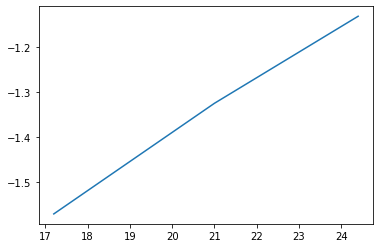

The plot shows that log(odds) of gambling increases as Division increases


In [88]:
#b
plt.plot(Division, Result)
plt.show()
print("The plot shows that log(odds) of gambling increases as Division increases")

#### (c) Because the relationship is quite linear, we could use a regression analysis)